In [98]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import confusion_matrix


In [2]:
#Carregar o Fashion MNIST dataset
fashion_mnist = fetch_openml('Fashion-MNIST', version=1, cache=True)

In [3]:
#Extrair as imagens e os rótulos
X= np.array(fashion_mnist['data'])
y= np.array(fashion_mnist['target'])

In [4]:
# Verificando as dimensões dos dados
print(f'Dimensões de X: {X.shape}')
print(f'Dimensões de y: {y.shape}')

# Estatísticas básicas dos dados
print('\nEstatísticas básicas das imagens:')
print(f'Média: {np.mean(X)}')
print(f'Desvio padrão: {np.std(X)}')
print(f'Mínimo: {np.min(X)}')
print(f'Máximo: {np.max(X)}')


Dimensões de X: (70000, 784)
Dimensões de y: (70000,)

Estatísticas básicas das imagens:
Média: 72.96981142492712
Desvio padrão: 90.00009426846664
Mínimo: 0
Máximo: 255


In [92]:
unique, counts = np.unique(y, return_counts=True)
class_counts = dict(zip(unique, counts))

print("Quantidade de exemplos em cada classe no conjunto total:")
for class_label, count in class_counts.items():
    print(f"Classe {class_label}: {count}")


Quantidade de exemplos em cada classe no conjunto total:
Classe 0: 7000
Classe 1: 7000
Classe 2: 7000
Classe 3: 7000
Classe 4: 7000
Classe 5: 7000
Classe 6: 7000
Classe 7: 7000
Classe 8: 7000
Classe 9: 7000


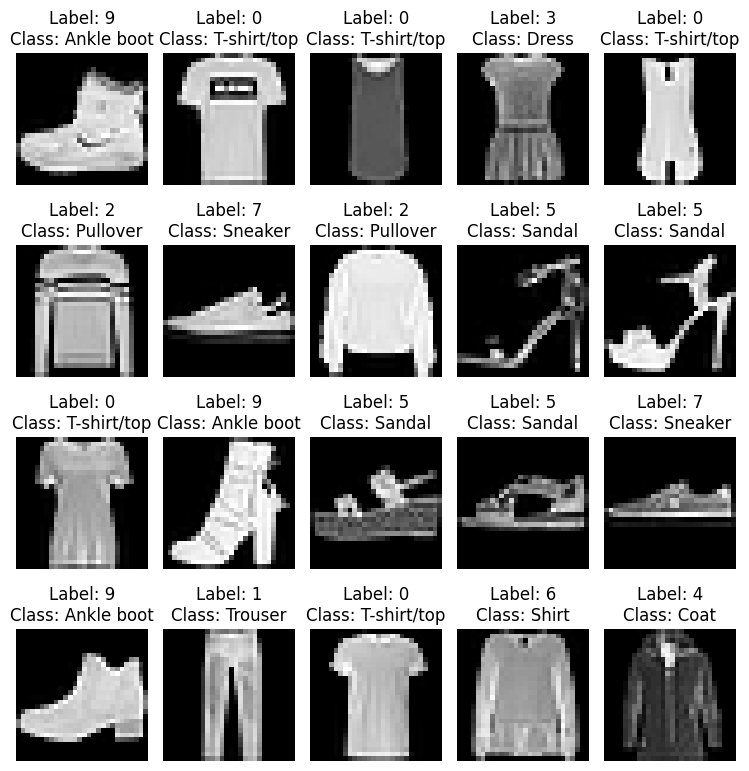

In [19]:
# Mapeamento de rótulos para nomes de classes
label_to_class = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

# Função para plotar algumas imagens com classes
def plot_images_with_classes(images, labels, num_rows, num_cols):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(1.5*num_cols, 2*num_rows))
    for i in range(num_rows * num_cols):
        ax = axes[i // num_cols, i % num_cols]
        ax.imshow(images[i].reshape(28, 28), cmap='gray')
        ax.set_title(f'Label: {labels[i]}\nClass: {label_to_class[int(labels[i])]}' )
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Verificar se y é string e converter para inteiros
if isinstance(y[0], str):
    y = y.astype(int)

# Plotando as primeiras 20 imagens do dataset com classes
plot_images_with_classes(X, y, 4, 5)

In [7]:
# Criar um DataFrame com algumas amostras de dados
num_samples = 5  # Número de amostras para mostrar
df_samples = pd.DataFrame(X[:num_samples])
df_samples['label'] = y[:num_samples]

# Mostrar o DataFrame
print(df_samples)

   0  1  2  3  4  5  6  7   8   9  ...  775  776  777  778  779  780  781  \
0  0  0  0  0  0  0  0  0   0   0  ...    0    0    0    0    0    0    0   
1  0  0  0  0  0  1  0  0   0   0  ...  114  130   76    0    0    0    0   
2  0  0  0  0  0  0  0  0   0  22  ...    0    1    0    0    0    0    0   
3  0  0  0  0  0  0  0  0  33  96  ...    0    0    0    0    0    0    0   
4  0  0  0  0  0  0  0  0   0   0  ...    0    0    0    0    0    0    0   

   782  783  label  
0    0    0      9  
1    0    0      0  
2    0    0      0  
3    0    0      3  
4    0    0      0  

[5 rows x 785 columns]


In [46]:
# Criar um DataFrame com algumas amostras de dados
num_samples = 5  # Número de amostras para mostrar
df_samples = pd.DataFrame(X_normalized[:num_samples])
df_samples['label'] = y[:num_samples]

# Mostrar o DataFrame
print(df_samples)

     0    1    2    3    4         5    6    7         8         9  ...  \
0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.000000  ...   
1  0.0  0.0  0.0  0.0  0.0  0.003922  0.0  0.0  0.000000  0.000000  ...   
2  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.086275  ...   
3  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.129412  0.376471  ...   
4  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  0.000000  ...   

        775       776       777  778  779  780  781  782  783  label  
0  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0      9  
1  0.447059  0.509804  0.298039  0.0  0.0  0.0  0.0  0.0  0.0      0  
2  0.000000  0.003922  0.000000  0.0  0.0  0.0  0.0  0.0  0.0      0  
3  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0      3  
4  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0      0  

[5 rows x 785 columns]


In [15]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [13]:
y

array(['9', '0', '0', ..., '8', '1', '5'], dtype=object)

In [18]:
# Converter y para inteiros
y = y.astype(int)

# Verificar se existem valores fora do intervalo [0, 255] em X
invalid_values = (X < 0) | (X > 255)
print(f'Valores inválidos em X: {np.sum(invalid_values)}')
print(f'Valores faltantes em X: {np.isnan(X).sum()}')

# Verificar se existem valores fora do intervalo [0, 9] em y
invalid_labels = (y < 0) | (y > 9)
print(f'Valores inválidos em y: {np.sum(invalid_labels)}')


Valores inválidos em X: 0
Valores faltantes em X: 0
Valores inválidos em y: 0


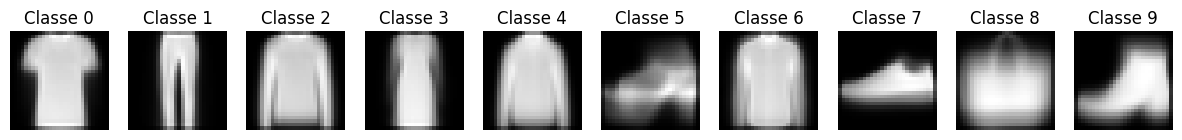

In [21]:
# Calculando e visualizando a imagem média por classe
num_classes = len(np.unique(y))
fig, axes = plt.subplots(1, num_classes, figsize=(15, 15))

for label in np.unique(y):
    class_data = X[y == label]
    mean_image = np.mean(class_data, axis=0).reshape(28, 28)
    axes[label].imshow(mean_image, cmap='gray')
    axes[label].set_title(f'Classe {label}')
    axes[label].axis('off')

plt.show()


In [22]:
# Normalizar os valores dos pixels para o intervalo [0, 1]
# X_normalized = X / 255.0

In [50]:
# Dividir os dados em conjuntos de treinamento (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Dimensões do conjunto de treinamento: X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'Dimensões do conjunto de teste: X_test: {X_test.shape}, y_test: {y_test.shape}')


Dimensões do conjunto de treinamento: X_train: (56000, 784), y_train: (56000,)
Dimensões do conjunto de teste: X_test: (14000, 784), y_test: (14000,)


In [93]:
# Contar a quantidade de exemplos em cada classe no conjunto de treinamento
unique, counts = np.unique(y_train, return_counts=True)
class_counts = dict(zip(unique, counts))

print("Quantidade de exemplos em cada classe no conjunto de treinamento:")
for class_label, count in class_counts.items():
    print(f"Classe {class_label}: {count}")


Quantidade de exemplos em cada classe no conjunto de treinamento:
Classe 0: 5606
Classe 1: 5598
Classe 2: 5593
Classe 3: 5551
Classe 4: 5643
Classe 5: 5551
Classe 6: 5593
Classe 7: 5641
Classe 8: 5658
Classe 9: 5566


In [65]:
from sklearn.linear_model import LogisticRegression

# Treinamento da Regressão Logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predição e avaliação
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f'Acurácia da Regressão Logística: {accuracy_log_reg:.4f}')

accuracy_reg = accuracy_score(y_test, y_pred_forest)
precision_reg = precision_score(y_test, y_pred_forest, average='weighted')
recall_reg = recall_score(y_test, y_pred_forest, average='weighted')
f1_reg = f1_score(y_test, y_pred_forest, average='weighted')

print(f'Acurácia do KNN: {accuracy_reg:.4f}')
print(f'Precisão do KNN: {precision_reg:.4f}')
print(f'Recall do KNN: {recall_reg:.4f}')
print(f'F1 Score do KNN: {f1_reg:.4f}')


Acurácia da Regressão Logística: 0.8415
Acurácia do KNN: 0.8861
Precisão do KNN: 0.8852
Recall do KNN: 0.8861
F1 Score do KNN: 0.8846


C:\Users\maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
from sklearn.neighbors import KNeighborsClassifier

# Treinamento do KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predição e avaliação
y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_forest)
precision_knn = precision_score(y_test, y_pred_forest, average='weighted')
recall_knn = recall_score(y_test, y_pred_forest, average='weighted')
f1_knn = f1_score(y_test, y_pred_forest, average='weighted')

print(f'Acurácia do KNN: {accuracy_knn:.4f}')
print(f'Precisão do KNN: {precision_knn:.4f}')
print(f'Recall do KNN: {recall_knn:.4f}')
print(f'F1 Score do KNN: {f1_knn:.4f}')


Acurácia do KNN: 0.8861
Precisão do KNN: 0.8852
Recall do KNN: 0.8861
F1 Score do KNN: 0.8846


In [26]:
from sklearn.svm import SVC

# Treinamento do SVM
svm = SVC()
svm.fit(X_train, y_train)

# Predição e avaliação
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Acurácia do SVM: {accuracy_svm:.4f}')

accuracy_svm = accuracy_score(y_test, y_pred_forest)
precision_svm = precision_score(y_test, y_pred_forest, average='weighted')
recall_svm = recall_score(y_test, y_pred_forest, average='weighted')
f1_svm = f1_score(y_test, y_pred_forest, average='weighted')

print(f'Acurácia do SVM: {accuracy_svm:.4f}')
print(f'Precisão do SVM: {precision_svm:.4f}')
print(f'Recall do SVM: {recall_svm:.4f}')
print(f'F1 Score do SVM: {f1_svm:.4f}')

Acurácia do SVM: 0.8888


In [62]:
from sklearn.tree import DecisionTreeClassifier

# Treinamento da Árvore de Decisão
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Predição e avaliação
y_pred_tree = tree.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_forest)
precision_tree = precision_score(y_test, y_pred_forest, average='weighted')
recall_tree = recall_score(y_test, y_pred_forest, average='weighted')
f1_tree = f1_score(y_test, y_pred_forest, average='weighted')

print(f'Acurácia do Árvore de Decisão: {accuracy_forest:.4f}')
print(f'Precisão do Árvore de Decisão: {precision_tree:.4f}')
print(f'Recall do Árvore de Decisão: {recall_tree:.4f}')
print(f'F1 Score do Árvore de Decisão: {f1_tree:.4f}')


Acurácia do Random Forest: 0.8861
Precisão do Random Forest: 0.8852
Recall do Random Forest: 0.8861
F1 Score do Random Forest: 0.8846


In [75]:
from sklearn.ensemble import RandomForestClassifier

# Treinamento do Random Forest
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)

# Predição e avaliação
y_pred_forest = forest.predict(X_test)
accuracy_forest = accuracy_score(y_test, y_pred_forest)
precision_forest = precision_score(y_test, y_pred_forest, average='weighted')
recall_forest = recall_score(y_test, y_pred_forest, average='weighted')
f1_forest = f1_score(y_test, y_pred_forest, average='weighted')

print(f'Acurácia do Random Forest: {accuracy_forest:.4f}')
print(f'Precisão do Random Forest: {precision_forest:.4f}')
print(f'Recall do Random Forest: {recall_forest:.4f}')
print(f'F1 Score do Random Forest: {f1_forest:.4f}')


Acurácia do Random Forest: 0.8837
Precisão do Random Forest: 0.8826
Recall do Random Forest: 0.8837
F1 Score do Random Forest: 0.8823


In [31]:
# Comparação das acurácias
results = {
    'Logistic Regression': accuracy_reg,
    'SVM': accuracy_svm,
    'KNN': accuracy_knn,
    'Decision Tree': accuracy_tree,
    'Random Forest': accuracy_forest,
}

# Print dos resultados
for model, accuracy in results.items():
    print(f'{model}: {accuracy:.4f}')


Logistic Regression: 0.8519
SVM: 0.8888
KNN: 0.8559
Decision Tree: 0.7937
Random Forest: 0.8851


Número de componentes escolhidos: 24


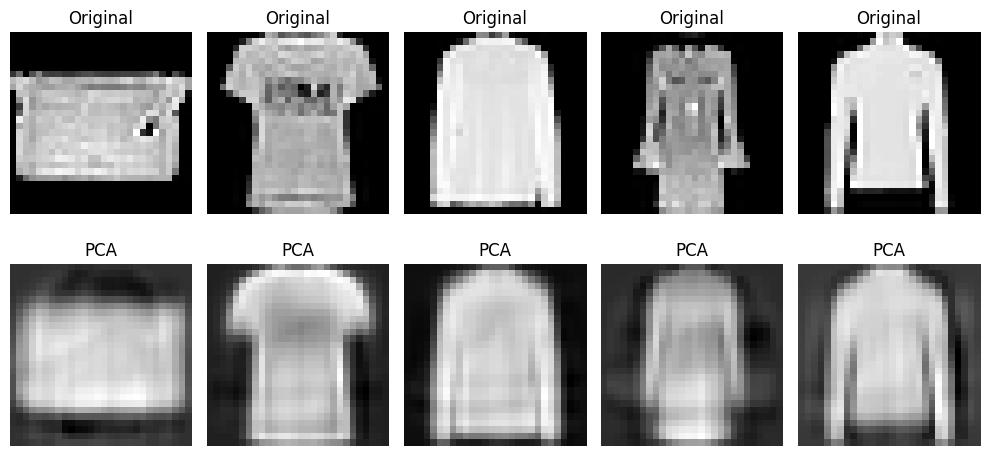

In [47]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Definindo o número de componentes para preservar 95% da variância
pca = PCA(n_components=0.80)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f'Número de componentes escolhidos: {pca.n_components_}')

# Visualizando algumas das imagens após PCA
def plot_pca_images(original_images, pca_images, num_images=5):
    fig, axes = plt.subplots(2, num_images, figsize=(10, 5))
    for i in range(num_images):
        # Imagens originais
        axes[0, i].imshow(original_images[i].reshape(28, 28), cmap='gray')
        axes[0, i].axis('off')
        axes[0, i].set_title('Original')
        
        # Imagens após PCA
        pca_image = pca.inverse_transform(pca_images[i]).reshape(28, 28)
        axes[1, i].imshow(pca_image, cmap='gray')
        axes[1, i].axis('off')
        axes[1, i].set_title('PCA')

    plt.tight_layout()
    plt.show()

# Plotando exemplos
plot_pca_images(X_train, X_train_pca)


Dimensões do conjunto de treinamento: X_train: (56000, 784), y_train: (56000,)
Dimensões do conjunto de teste: X_test: (14000, 784), y_test: (14000,)
Número de componentes escolhidos: 370


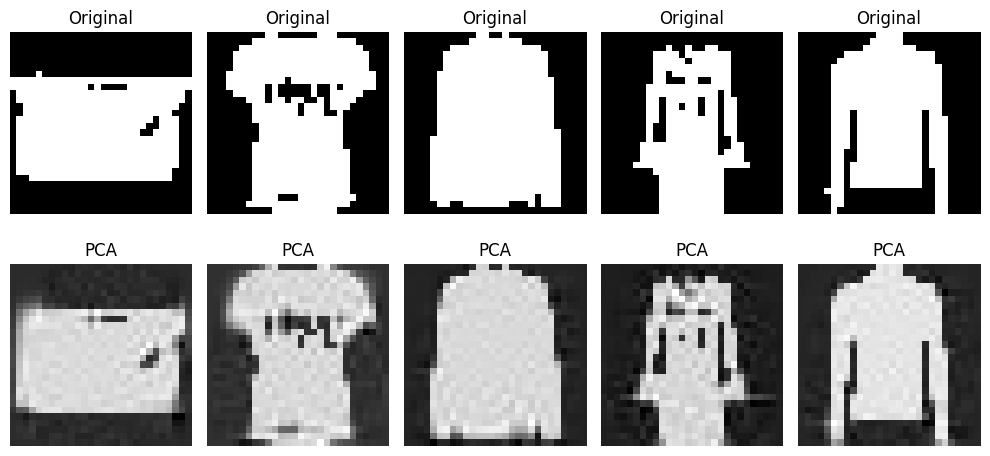

In [49]:
from sklearn.preprocessing import Binarizer
from sklearn.decomposition import PCA

# Dividir os dados em conjuntos de treinamento (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Dimensões do conjunto de treinamento: X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'Dimensões do conjunto de teste: X_test: {X_test.shape}, y_test: {y_test.shape}')

# Binarização dos dados (threshold = 0.5 após normalização)
binarizer = Binarizer(threshold=0.5)
X_train_binarized = binarizer.fit_transform(X_train / 255.0)
X_test_binarized = binarizer.transform(X_test / 255.0)

# Aplicação do PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_binarized)
X_test_pca = pca.transform(X_test_binarized)

print(f'Número de componentes escolhidos: {pca.n_components_}')

# Função para plotar imagens
def plot_pca_images(original_images, pca_images, num_images=5):
    fig, axes = plt.subplots(2, num_images, figsize=(10, 5))
    for i in range(num_images):
        # Imagens originais
        axes[0, i].imshow(original_images[i].reshape(28, 28), cmap='gray')
        axes[0, i].axis('off')
        axes[0, i].set_title('Original')
        
        # Imagens após PCA
        pca_image = pca.inverse_transform(pca_images[i]).reshape(28, 28)
        axes[1, i].imshow(pca_image, cmap='gray')
        axes[1, i].axis('off')
        axes[1, i].set_title('PCA')

    plt.tight_layout()
    plt.show()

# Plotando exemplos
plot_pca_images(X_train_binarized, X_train_pca)


In [82]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Normalização dos dados para o intervalo [0, 1]
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

# Aplicação do PCA para reduzir a dimensionalidade dos dados
pca = PCA(n_components=0.80)  # Mantém 95% da variância
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Treinamento do Random Forest usando os dados após PCA
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train_pca, y_train)

# Predição e avaliação
y_pred_forest_PCA = forest.predict(X_test_pca)
accuracy_forest_PCA = accuracy_score(y_test, y_pred_forest_PCA)
precision_forest_PCA = precision_score(y_test, y_pred_forest_PCA, average='weighted')
recall_forest_PCA = recall_score(y_test, y_pred_forest_PCA, average='weighted')
f1_forest_PCA = f1_score(y_test, y_pred_forest_PCA, average='weighted')

print(f'Acurácia do Random Forest após PCA: {accuracy_forest_PCA:.4f}')
print(f'Precisão do Random Forest após PCA: {precision_forest_PCA:.4f}')
print(f'Recall do Random Forest após PCA: {recall_forest_PCA:.4f}')
print(f'F1 Score do Random Forest após PCA: {f1_forest_PCA:.4f}')


Acurácia do Random Forest após PCA: 0.8579
Precisão do Random Forest após PCA: 0.8565
Recall do Random Forest após PCA: 0.8579
F1 Score do Random Forest após PCA: 0.8564


In [76]:
print(f'Acurácia do Random Forest sem PCA: {accuracy_forest:.4f}')
print(f'Precisão do Random Forest sem PCA: {precision_forest:.4f}')
print(f'Recall do Random Forest sem PCA: {recall_forest:.4f}')
print(f'F1 Score do Random Forest sem PCA: {f1_forest:.4f}')

Acurácia do Random Forest sem PCA: 0.8837
Precisão do Random Forest sem PCA: 0.8826
Recall do Random Forest sem PCA: 0.8837
F1 Score do Random Forest sem PCA: 0.8823


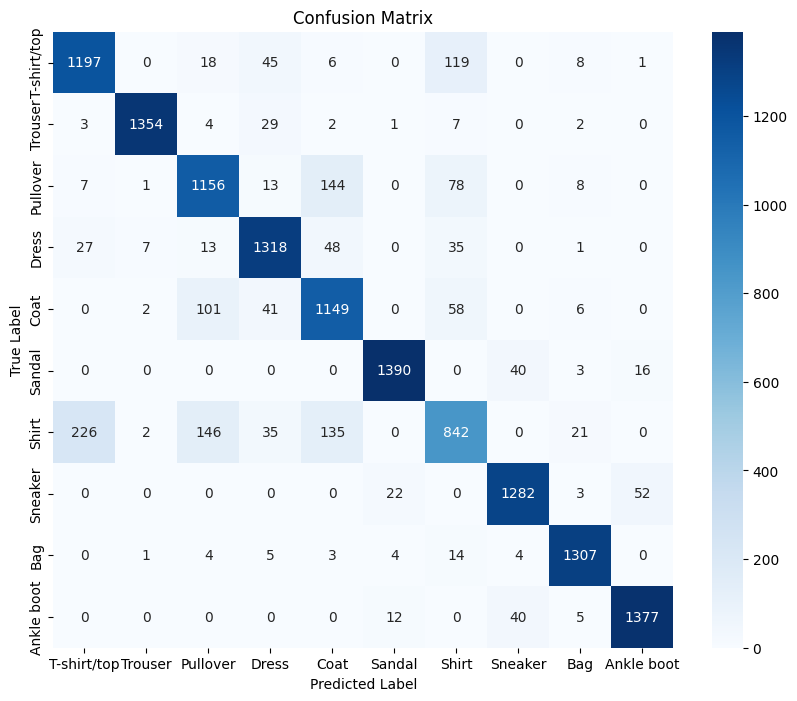

In [97]:
# Nomes das classes
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_forest)

# Plotar a matriz de confusão
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [88]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarizar os rótulos para ROC
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Calcular as pontuações de previsão para cada classe
y_score = forest.predict_proba(X_test_pca)

In [94]:
from sklearn.model_selection import GridSearchCV

# Definir a grade de parâmetros
# param_grid = {
#    'n_estimators': [100, 200, 300],
#    'max_depth': [10, 20, 30, None],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4]
#}
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2]
}

# Configurar a busca em grade
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2,
                           scoring='accuracy')

# Realizar a busca em grade com os dados PCA
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_forest = grid_search.best_estimator_

# Predição e avaliação com o melhor modelo
y_pred_best_forest = best_forest.predict(X_test)
accuracy_best_forest = accuracy_score(y_test, y_pred_best_forest)
precision_best_forest = precision_score(y_test, y_pred_best_forest, average='weighted')
recall_best_forest = recall_score(y_test, y_pred_best_forest, average='weighted')
f1_best_forest = f1_score(y_test, y_pred_best_forest, average='weighted')

print(f'Melhor Acurácia do Random Forest após Grid Search: {accuracy_best_forest:.4f}')
print(f'Melhor Precisão do Random Forest após Grid Search: {precision_best_forest:.4f}')
print(f'Melhor Recall do Random Forest após Grid Search: {recall_best_forest:.4f}')
print(f'Melhor F1 Score do Random Forest após Grid Search: {f1_best_forest:.4f}')


Fitting 3 folds for each of 54 candidates, totalling 162 fits


KeyboardInterrupt: 

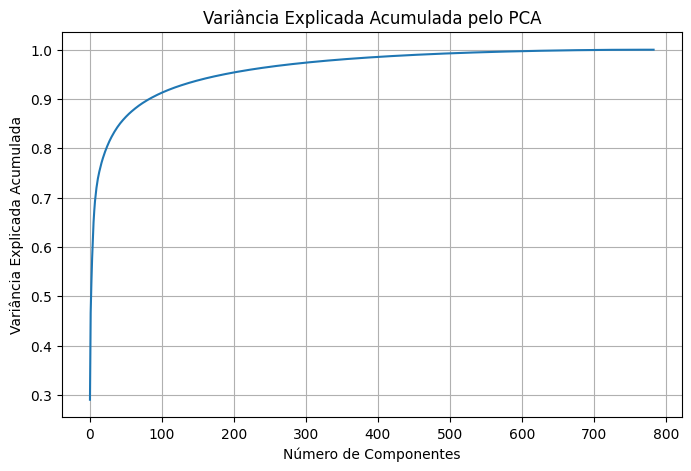

In [100]:
from sklearn.decomposition import PCA

# Calcular a variância explicada cumulativa
pca = PCA().fit(X_train)
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada Acumulada pelo PCA')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Definir a grade de parâmetros
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Configurar a busca em grade
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=3, n_jobs=-1, scoring='accuracy')

# Aplicação do PCA para reduzir a dimensionalidade dos dados
pca = PCA(n_components=0.95)  # Mantém 95% da variância
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Realizar a busca em grade com os dados após PCA
grid_search.fit(X_train_pca, y_train)

# Melhor modelo encontrado
best_svm = grid_search.best_estimator_

# Predição e avaliação com o melhor modelo
y_pred_best_svm = best_svm.predict(X_test_pca)
accuracy_best_svm = accuracy_score(y_test, y_pred_best_svm)
precision_best_svm = precision_score(y_test, y_pred_best_svm, average='weighted')
recall_best_svm = recall_score(y_test, y_pred_best_svm, average='weighted')
f1_best_svm = f1_score(y_test, y_pred_best_svm, average='weighted')

print(f'Melhor Acurácia do SVM após Grid Search: {accuracy_best_svm:.4f}')
print(f'Melhor Precisão do SVM após Grid Search: {precision_best_svm:.4f}')
print(f'Melhor Recall do SVM após Grid Search: {recall_best_svm:.4f}')
print(f'Melhor F1 Score do SVM após Grid Search: {f1_best_svm:.4f}')
